In [550]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt

from plotly import express as px
import cufflinks
cufflinks.go_offline()

from pprint import pprint
from glob import glob
from tqdm.notebook import tqdm_notebook as tqdm

import sys
sys.path.append('../')

from src.data.gibdd_filter import GibddFilter
from src.data import normalize_name

import warnings
warnings.simplefilter('ignore')

# LOAD DATA

In [722]:
df = pd.read_parquet('../data/processed/gibdd.parquet')
# df = df[df['operation_reason'] == 'первичная регистрация']

df.shape

(2088946, 23)

In [724]:
df.sample(10)

,coato,vehicle_type,registration_date,brand,model,class,origin,chassis_config,year,vin,primary,affiliation,code,mass_max,mass_idle,inn,region,city,activity_field,Наименование,Федеральный округ до 2011,Федеральный округ,operation_reason
operation_date,,,,,,,,,,,,,,,,,,,,,,,
2018-08-30,1166,С,NaT,КАМАЗ,6520,HDT3,О,6x4,2017.0,XTC652004H1371337,11,1,None,NaN,13025.0,6731080228,None,Г СМОЛЕНСК,Строительная,Смоленская область,Центральный ФО,Центральный ФО,первичная регистрация
2017-12-21,1114,С,2017-12-21,VOLVO,FH TRUCK,HDT3,И,4x2,2008.0,YV2ASG0A19B534910,94,2,4,NaN,7277.0,None,None,Г СТАРЫЙ ОСКОЛ,ФИЗ ЛИЦО,Белгородская область,Центральный ФО,Центральный ФО,"Изменение собственника по сделкам, произведенн..."
2014-07-04,1149,С,2014-07-04,HINO,300,MDT1,И,4x2,2013.0,X8918047CD0EZ4088,94,1,6,NaN,NaN,5321127505,ВЕЛИКИЙ НОВГОРОД,ВЕЛИКИЙ НОВГОРОД,Сельское хозяйство,Новгородская область,Северо-Западный ФО,Северо-Западный ФО,"Изменение собственника по сделкам, произведенн..."
2019-10-22,1103,С,2019-10-22,HYUNDAI,HD72,MDT1,С,4x2,2007.0,X9H47430070000647,94,2,3,NaN,NaN,None,ТБИЛИССКИЙ Р-Н.,Х СЕВЕРИН,ФИЗ ЛИЦО,Краснодарский край,Южный ФО,Южный ФО,"Изменение собственника по сделкам, произведенн..."
2017-07-20,1140,С,NaT,КАМАЗ,6520 ЛЮКС,HDT3,О,6x4,2017.0,XTC652004H1357661,11,1,None,NaN,13000.0,9909422817,None,None,Прочие,Санкт-Петербург,Северо-Западный ФО,Северо-Западный ФО,первичная регистрация
2013-09-07,1125,С,2010-10-29,MAN,40.480,HDT3,И,6x4,2008.0,X3W6539CB80000039,41,1,5,NaN,15000.0,3811121121,ОКТЯБРЬСКИЙ,ИРКУТСК,Лизинговая компания,Иркутская область,Сибирский ФО,Сибирский ФО,замена государственного регистрационного знака
2013-10-29,1122,С,2013-10-29,ГАЗ,3309,MDT2,О,4x2,2013.0,X8978570FDCFC0134,11,1,54,NaN,4085.0,5257034378,КАНАВИНСКИЙ,НИЖ.НОВГОРОД,Лизинговая компания,Нижегородская область,Приволжский ФО,Приволжский ФО,первичная регистрация
2015-09-15,1145,С,2001-01-01,SCANIA,P380CB,HDT3,И,6x4,2012.0,X8UP6X40005295085,12,1,5,NaN,13535.0,7702059544,МЕЩАНСКИЙ (ЦАО) Р-Н,None,None,Москва,Центральный ФО,Центральный ФО,"регистрация, снятых с учета"
2019-12-05,1188,С,2019-12-05,SCANIA,G400LA,HDT2,И,4x2,2014.0,YS2G4X20002098123,94,1,4,NaN,7704.0,1215218224,None,Г ЙОШКАР-ОЛА,Коммерческие перевозки,Марий-Эл,Приволжский ФО,Приволжский ФО,"Изменение собственника по сделкам, произведенн..."


In [83]:
df['new_car'] = (df['operation_reason'] == 'первичная регистрация')

In [84]:
df

,coato,vehicle_type,registration_date,brand,model,class,origin,chassis_config,year,vin,primary,affiliation,code,mass_max,mass_idle,inn,region,city,activity_field,Наименование,Федеральный округ до 2011,Федеральный округ,operation_reason,new_car
operation_date,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-15,1111,С,2013-01-15,КАМАЗ,43118,HDT2,О,6x6,2012.0,X89637211C0EM2028,11,1,9,NaN,11740.0,2901221866,АРХАНГЕЛЬСК. ОБЛ,АРХАНГЕЛЬСК Г,Лесная,Архангельская область,Северо-Западный ФО,Северо-Западный ФО,первичная регистрация,True
2013-01-15,1111,С,2013-01-15,КАМАЗ,43118,HDT2,О,6x6,2012.0,X89637210C0EM2030,11,1,9,NaN,9590.0,2901221866,АРХАНГЕЛЬСК. ОБЛ,АРХАНГЕЛЬСК Г,Лесная,Архангельская область,Северо-Западный ФО,Северо-Западный ФО,первичная регистрация,True
2013-01-10,1146,С,2001-01-01,HYUNDAI,HD78,MDT1,И,4x2,2012.0,XUH27990AC0000918,11,1,3,NaN,NaN,5075019819,РУЗСКИЙ Р-Н,ДОРОХОВО,None,Московская область,Центральный ФО,Центральный ФО,первичная регистрация,True
2013-01-10,1146,С,2001-01-01,КАМАЗ,43253,HDT2,О,4x2,2012.0,X5V580421C0000280,11,1,59,NaN,8100.0,5032033791,ОДИНЦОВСКИЙ Р-Н,ГОЛИЦЫНО,None,Московская область,Центральный ФО,Центральный ФО,первичная регистрация,True
2013-01-10,1146,С,2001-01-01,КАМАЗ,43253,HDT2,О,4x2,2012.0,X5V580421C0000281,11,1,59,NaN,8100.0,5032033791,ОДИНЦОВСКИЙ Р-Н,ГОЛИЦЫНО,None,Московская область,Центральный ФО,Центральный ФО,первичная регистрация,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06,1122,С,2020-03-06,ГАЗ,33088,MDT1,О,4x4,2019.0,XUY3813G0L0000809,11,1,55.0,NaN,5450.0,5260200603,None,Г НИЖНИЙ НОВГОРОД,None,Нижегородская область,Приволжский ФО,Приволжский ФО,первичная регистрация,True
2020-03-06,1122,С,2020-03-06,ГАЗ,33088,MDT1,О,4x4,2019.0,XUY3813G0L0000810,11,1,55.0,NaN,5450.0,5260200603,None,Г НИЖНИЙ НОВГОРОД,None,Нижегородская область,Приволжский ФО,Приволжский ФО,первичная регистрация,True
2020-03-06,1122,С,2020-03-06,ГАЗ,C41RB3,MDT2,О,4x2,2020.0,Z783010GDL0061957,11,1,1.0,NaN,5250.0,5036170703,None,Г ПОДОЛЬСК,None,Нижегородская область,Приволжский ФО,Приволжский ФО,первичная регистрация,True


### Drop small carparks

In [88]:
MIN_CARPARK_SIZE = 50

vin_per_inn = df.groupby('inn')['vin'].nunique() 
inn_list = vin_per_inn[vin_per_inn > MIN_CARPARK_SIZE].index
df = df[df['inn'].isin(inn_list)]

In [89]:
%time tmp = df.groupby('inn')['vin'].resample('1M').nunique()

CPU times: user 3.07 s, sys: 23 ms, total: 3.1 s
Wall time: 3.05 s


### VISUALIZATION

7706217230


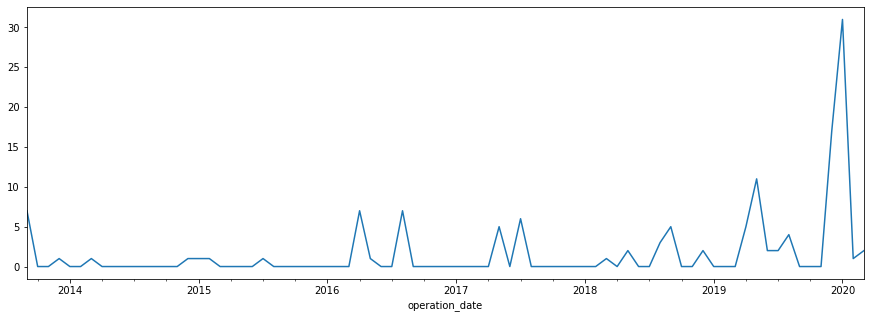

In [99]:
rand_inn = np.random.choice(df.loc['2019']['inn'].unique())
print(rand_inn)
tmp.loc[rand_inn].plot(figsize=(15,5))
plt.show()

In [213]:
acorr = tmp.groupby('inn').agg([lambda x: x.autocorr(12), 'sum'])
acorr.columns = ['acorr', 'sum']

In [214]:
inn_list = acorr.dropna().sort_values(['acorr', 'sum']).head(30).index

In [266]:
acorr.query('0.01 <= acorr <= 0.03')

,acorr,sum
inn,,
1435133520,0.014479,100
1644046768,0.012001,105
1650208400,0.018333,94
1650291260,0.027499,198
1831015625,0.019038,62
2356045713,0.016554,51
2454013163,0.026786,56
4324006553,0.027772,88
4607004691,0.010940,66


In [275]:
s = tmp.reset_index('inn').groupby('inn').resample('1Y').sum()['vin']

In [ ]:
s.loc['']

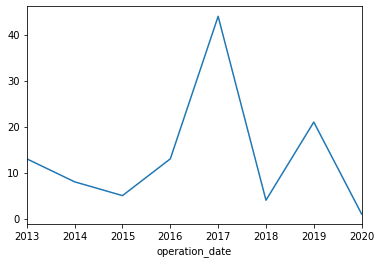

In [279]:
s.loc['6806002910'].plot()

In [252]:
(acorr['acorr']*acorr['sum']).dropna().sort_values().tail(100)

inn
7743119961      43.865845
7731415934      44.141802
6317024749      44.546783
7724562430      44.560464
5406301664      44.889948
                 ...     
6713005690     441.240656
7708503727     995.362843
5250056647    1008.522196
8602060555    1164.991128
7714211088    1528.434811
Length: 100, dtype: float64

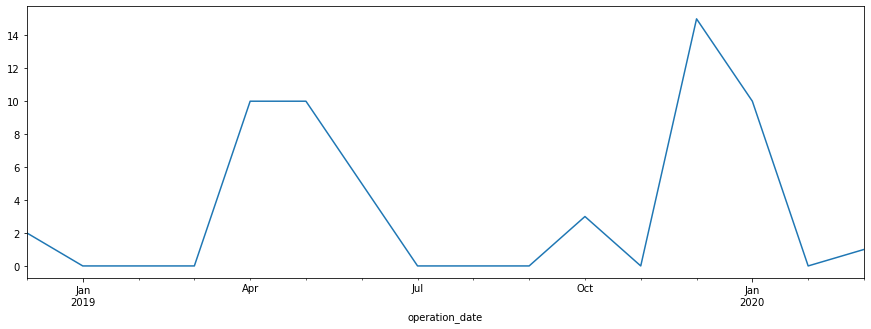

In [253]:
tmp.loc['7743119961'].plot(figsize=(15,5))

In [265]:
tmp.loc['5502020634'].autocorr(12)

0.02715146559310412

In [ ]:
5502020634
5027130077
6806002910
7706217230

7708503727
8602060555
7714211088


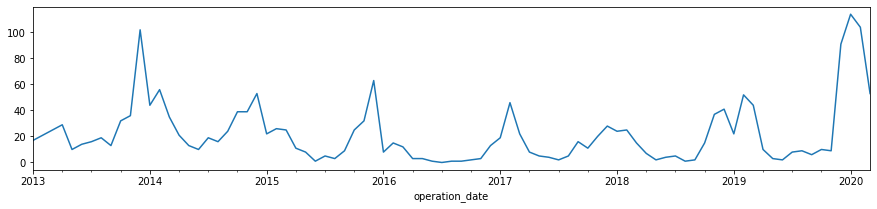

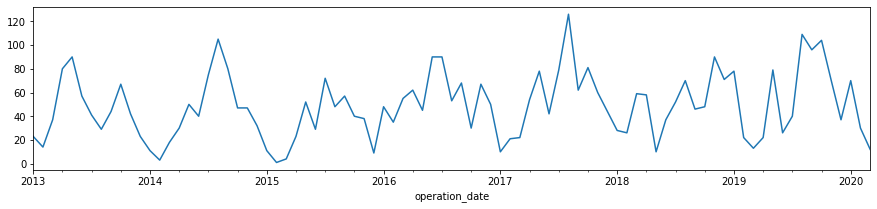

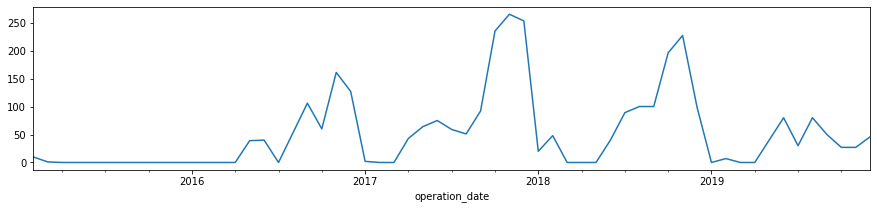

In [283]:
for inn in ['7708503727', '8602060555', '7714211088']:
    tmp.loc[inn].plot(figsize=(15,3))
    plt.show()

In [291]:
df.head()

,coato,vehicle_type,registration_date,brand,model,class,origin,chassis_config,year,vin,primary,affiliation,code,mass_max,mass_idle,inn,region,city,activity_field,Наименование,Федеральный округ до 2011,Федеральный округ,operation_reason
operation_date,,,,,,,,,,,,,,,,,,,,,,,
2013-01-15,1111,С,2013-01-15,КАМАЗ,43118,HDT2,О,6x6,2012.0,X89637211C0EM2028,11,1,9,NaN,11740.0,2901221866,АРХАНГЕЛЬСК. ОБЛ,АРХАНГЕЛЬСК Г,Лесная,Архангельская область,Северо-Западный ФО,Северо-Западный ФО,первичная регистрация
2013-01-15,1111,С,2013-01-15,КАМАЗ,43118,HDT2,О,6x6,2012.0,X89637210C0EM2030,11,1,9,NaN,9590.0,2901221866,АРХАНГЕЛЬСК. ОБЛ,АРХАНГЕЛЬСК Г,Лесная,Архангельская область,Северо-Западный ФО,Северо-Западный ФО,первичная регистрация
2013-01-09,1146,С,2001-01-01,МАЗ,5440А8-360-031,HDT2,И,4x2,2008.0,Y3M5440A880000074,47,1,4,NaN,8050.0,7710669504,РУЗСКИЙ Р-Н,РУЗА,Лизинговая компания,Московская область,Центральный ФО,Центральный ФО,наличие запретов и ограничений
2013-01-09,1146,С,2001-01-01,МАЗ,437043,HDT1,И,4x2,2008.0,Y3M43704380000253,12,1,1,NaN,4800.0,5029166093,МЫТИЩИНСКИЙ Р-Н,МЫТИЩИ,None,Московская область,Центральный ФО,Центральный ФО,"регистрация, снятых с учета"
2013-01-09,1146,С,2001-01-01,МАЗ,5440А8,HDT2,И,4x2,2008.0,Y3M5440A880000181,47,1,4,NaN,8050.0,7710669504,РУЗСКИЙ Р-Н,РУЗА,Лизинговая компания,Московская область,Центральный ФО,Центральный ФО,наличие запретов и ограничений


In [574]:
df = df[['vin', 'inn', 'operation_reason']]

In [576]:
df['vin'].value_counts().value_counts(normalize=True).round(4)

1     0.6023
2     0.2615
3     0.0950
4     0.0296
5     0.0087
6     0.0023
7     0.0005
8     0.0001
9     0.0000
10    0.0000
11    0.0000
19    0.0000
Name: vin, dtype: float64

In [310]:
pprint(df['operation_reason'].unique().tolist())

['первичная регистрация',
 'Изменение собственника по сделкам, произведенным в любой форме с сохранением '
 'государственных регистрационных знаков',
 'замена государственного регистрационного знака',
 'регистрация, снятых с учета',
 'изменение Ф.И.О. (наименования) владельца',
 'замена номерного агрегата, цвета, изменение конструкции ТС',
 None,
 'коррекция иных реквизитов']


In [314]:
df['is_new'] = (df['operation_reason'] == 'первичная регистрация')

In [320]:
df.groupby('vin')['is_new'].mean().value_counts()

0.000000    505066
1.000000    151767
0.500000     21015
0.333333      2364
0.250000       154
0.200000        20
0.666667         7
Name: is_new, dtype: int64

In [832]:
df = df[(df['operation_reason'] == 'первичная регистрация')]

In [833]:
vin_per_inn = df.groupby('inn')['vin'].agg(set).to_dict()

In [834]:
min_vin_per_inn = 30
tmp = df.groupby('inn')['vin'].nunique() 
inn_list = tmp[tmp >= min_vin_per_inn].index.tolist()

In [859]:
series

,operation_date,vin
0,NaN,10
1,1.033333,10
2,1.000000,10


In [861]:
res = []
for inn in inn_list:
    tmp = df.loc[df['vin'].isin(vin_per_inn[inn]), ['vin']].drop_duplicates(keep='first')
    
    series = tmp['vin'].resample('1M').count().replace(0, np.nan).dropna()
    
    res.append(len(series))

In [873]:
res = np.asarray(res)
inn_list = np.asarray(inn_list)

In [877]:
inn_list = inn_list[res > 3]
res = res[res > 3]

In [892]:
res[np.argsort(res)[-100:]]

array([38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40,
       40, 40, 41, 41, 41, 42, 42, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46,
       46, 47, 47, 48, 48, 48, 48, 48, 49, 49, 50, 51, 51, 51, 52, 52, 52,
       52, 52, 52, 53, 53, 54, 54, 54, 54, 55, 55, 56, 56, 56, 57, 57, 57,
       57, 57, 58, 58, 59, 59, 60, 60, 60, 60, 60, 60, 61, 61, 61, 62, 63,
       63, 63, 64, 64, 65, 65, 66, 67, 69, 74, 79, 82, 85, 86, 87])

In [893]:
inn_list[np.argsort(res)[-100:]]

array(['2528000813', '2724132118', '7718607570', '7705002602',
       '6671163413', '1650081520', '7707009586', '7704784450',
       '0274089610', '2801099482', '7709413138', '7724522491',
       '7017005289', '7803002209', '4205049090', '0276053659',
       '7721546864', '5256052039', '6315576977', '7709780434',
       '8608053040', '1639034661', '8602060185', '7705098679',
       '1660110241', '7724887862', '4704041900', '0277071467',
       '7704221591', '3840001848', '8601025290', '6376000010',
       '7703770101', '7203175930', '8609016058', '7802059185',
       '6713005700', '6432005462', '5036065113', '2328000083',
       '3801079671', '5003028028', '3235002178', '7705741770',
       '7714572888', '8620001545', '2315072242', '7706660065',
       '1650032058', '2466240347', '6450925977', '0265028636',
       '1645000340', '3905019765', '7806326138', '7721632827',
       '5260900725', '7721618974', '8602053340', '0278039018',
       '7709787790', '5260200603', '6317024749', '86080

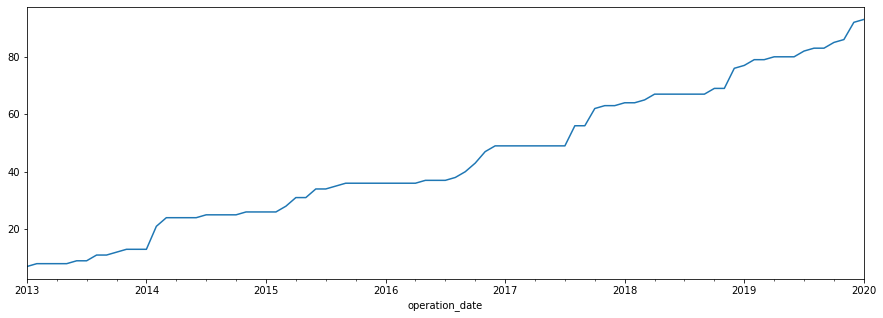

In [897]:
rand_inn = '2528000813'
tmp = df.loc[df['vin'].isin(vin_per_inn[rand_inn]), ['vin']].drop_duplicates(keep='first')

tmp['1'] = 1
tmp['1'].sort_index().cumsum().resample('1M').max().fillna(method='ffill').plot(figsize=(15,5))

In [860]:
mean_diff = []
series_len = []
for inn in inn_list:
    tmp = df.loc[df['vin'].isin(vin_per_inn[inn]), ['vin']].drop_duplicates(keep='first')
    
    series = tmp['vin'].resample('1M').count().replace(0, np.nan).dropna().reset_index()
    series['operation_date'] = series['operation_date'].diff().dt.days / 30
    
    mean_diff.append(series['operation_date'].mean())
    series_len.append(len(series))

In [852]:
np.asarray(inn_list)[np.argsort(mean_diff)[-100:]]

array(['2005504189', '7707033437', '4807014489', '8602034629',
       '0274161458', '2635059868', '2524004983', '7719282597',
       '8604035473', '6161060925', '1433015633', '7717709594',
       '1614009744', '6136009530', '5905009270', '8706004153',
       '8603151854', '4345214378', '7743022470', '7722303536',
       '3808167736', '5504237696', '2536238560', '3103005479',
       '7726671234', '6672256004', '3444215740', '7723677100',
       '7814602335', '7202214946', '8612014460', '7727249522',
       '5003003432', '7715943550', '7017213271', '3309007712',
       '5402159093', '2308124997', '1655262023', '6154002993',
       '3911009290', '0711038668', '7719788792', '6321202056',
       '4028028130', '7728623959', '7736660136', '2538111015',
       '7807371542', '2225074005', '1650214682', '7536129898',
       '1322122090', '3801039245', '1650145647', '7701011412',
       '6731041941', '6151012111', '4703006839', '7727763150',
       '2302048838', '6722015582', '5024074434', '16490

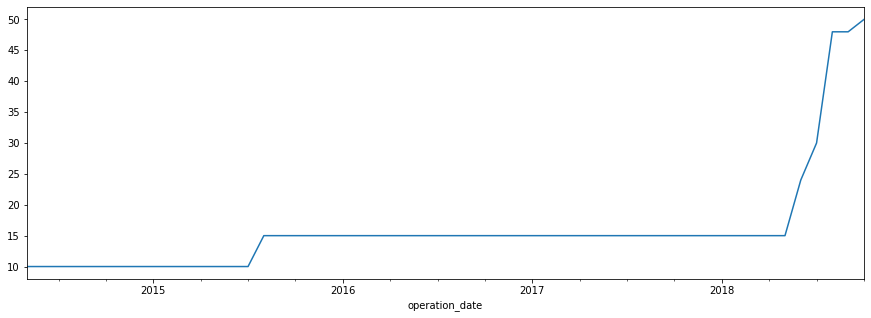

In [857]:
rand_inn = '7814602335'
tmp = df.loc[df['vin'].isin(vin_per_inn[rand_inn]), ['vin']].drop_duplicates(keep='first')

tmp['1'] = 1
series = tmp['1'].sort_index().cumsum().resample('1M').max().fillna(method='ffill')
series.plot(figsize=(15,5))

In [851]:
np.argsort(mean_diff)

array([1194, 1310,   48, ...,  683, 1435,  210])

In [731]:
rand_inn = np.random.choice(inn_list)
print(rand_inn)

tmp = df.loc[df['vin'].isin(vin_per_inn[rand_inn]), ['vin']].drop_duplicates(keep='first')

7805084920


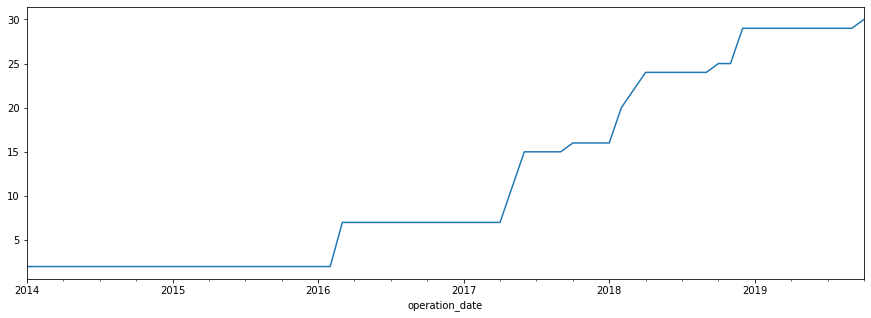

In [732]:
tmp['1'] = 1
series = tmp['1'].sort_index().cumsum().resample('1M').max().fillna(method='ffill')
series.plot(figsize=(15,5))

In [829]:
rand_inn = np.random.choice(inn_list)
print(rand_inn)

tmp = df.loc[df['vin'].isin(vin_per_inn[rand_inn]), ['vin']].drop_duplicates(keep='first')

series = tmp['vin'].resample('1M').count().replace(0, np.nan).dropna().reset_index()
series['operation_date'] = series['operation_date'].diff().dt.days / 30

6501090599


In [830]:
display(series)
print(series['operation_date'].mean())
print(series['operation_date'].median())
print(series['operation_date'].max())

,operation_date,vin
0,NaN,2.0
1,4.066667,1.0
2,7.166667,1.0
3,2.966667,1.0
4,23.366667,2.0
5,3.033333,2.0
6,4.100000,1.0
7,1.000000,1.0
8,3.000000,1.0
9,1.033333,1.0


6.019047619047619
4.05
23.366666666666667


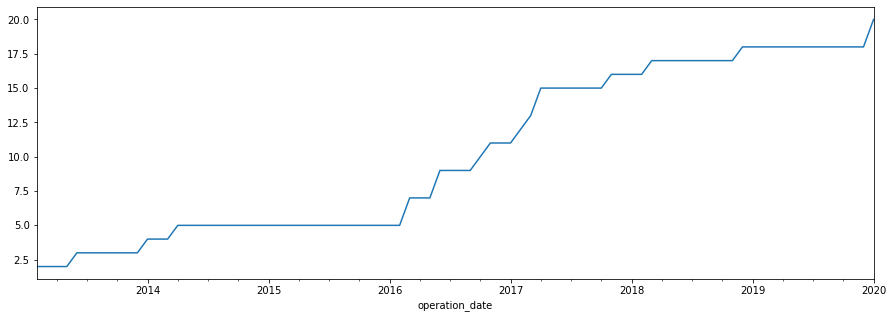

In [831]:
tmp['1'] = 1
series = tmp['1'].sort_index().cumsum().resample('1M').max().fillna(method='ffill')
series.plot(figsize=(15,5))

In [698]:
df.loc[df['vin'].isin(vin_per_inn[rand_inn])].sort_index()

,vin,inn,operation_reason
operation_date,,,
2019-06-04,X8963370GK0DY5322,5401373753,первичная регистрация
2019-06-06,X89451204K0AA3443,5401373753,первичная регистрация
2019-06-28,X89455404K0AA3560,5401373753,первичная регистрация
2019-06-28,X89455408K0AA3316,5401373753,первичная регистрация
2019-07-02,X89455408K0AA3318,5401373753,первичная регистрация
2019-07-23,XUB3784TBK0000163,5401373753,первичная регистрация
2019-08-01,XUB3784TFK0000164,5401373753,первичная регистрация
2019-09-10,X89702870K0BR0092,5401373753,первичная регистрация
2019-11-07,X3E250700K0002289,5401373753,первичная регистрация


In [666]:
series

operation_date
2013-02-28      1.0
2013-03-31      1.0
2013-04-30      2.0
2013-05-31      2.0
2013-06-30      3.0
              ...  
2019-08-31    113.0
2019-09-30    113.0
2019-10-31    113.0
2019-11-30    114.0
2019-12-31    116.0
Freq: M, Name: 1, Length: 83, dtype: float64

In [635]:
series = tmp['1'].resample('1M').sum()
series.replace(0, np.nan).dropna().reset_index()['operation_date'].diff()

0         NaT
1    122 days
2     59 days
3     61 days
4     61 days
5     31 days
6    578 days
7     31 days
8     30 days
9    214 days
10   151 days
11    61 days
12   761 days
13    31 days
14    30 days
15   123 days
16    29 days
Name: operation_date, dtype: timedelta64[ns]

In [636]:
rand_inn = np.random.choice(inn_list)
print(rand_inn)

8904035523


In [637]:
rand_inn

'8904035523'

In [623]:
res = []
for rand_inn in tqdm(inn_list):

    carpark = df.loc[df['vin'].isin(vin_per_inn[rand_inn])].query('inn == @rand_inn').sort_index()[['vin']].drop_duplicates(keep='first')
    carpark.loc[:] = 1
    carpark_update = carpark[['vin']].resample('1Q').sum().replace(0, np.nan).dropna()
    carpark_update['operation_date'] = carpark_update.index

    carpark_update['window'] = carpark_update['operation_date'].diff()
    carpark_update.drop('operation_date', axis=1, inplace=True)

    carpark_update['inn'] = rand_inn
    carpark_update.reset_index(drop=True, inplace=True)
    res.append(carpark_update)

In [624]:
res = pd.concat(res, axis=0).reset_index(drop=True)

In [561]:
res = res.dropna()

In [626]:
res['window'] = res['window'].dt.days

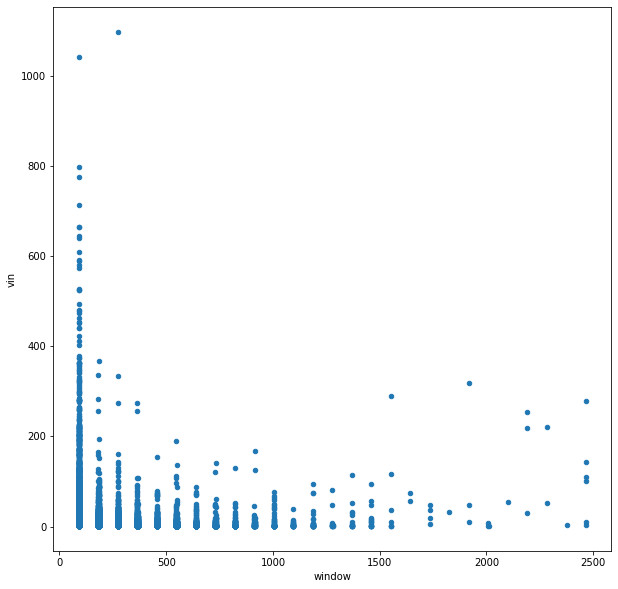

In [628]:
res.plot.scatter(x='window', y='vin', figsize=(10,10))

In [629]:
df

,vin,inn,operation_reason
operation_date,,,
2013-01-15,X89637211C0EM2028,2901221866,первичная регистрация
2013-01-15,X89637210C0EM2030,2901221866,первичная регистрация
2013-01-09,Y3M5440A880000074,7710669504,наличие запретов и ограничений
2013-01-09,Y3M43704380000253,5029166093,"регистрация, снятых с учета"
2013-01-09,Y3M5440A880000181,7710669504,наличие запретов и ограничений
...,...,...,...
2020-03-06,XUY3813G0L0000811,5260200603,первичная регистрация
2020-03-10,X9PAG20A6DW112147,5263085388,изменение Ф.И.О. (наименования) владельца
2020-03-10,Z9M94403250082484,5261068651,"Изменение собственника по сделкам, произведенн..."


In [725]:
df

,coato,vehicle_type,registration_date,brand,model,class,origin,chassis_config,year,vin,primary,affiliation,code,mass_max,mass_idle,inn,region,city,activity_field,Наименование,Федеральный округ до 2011,Федеральный округ,operation_reason
operation_date,,,,,,,,,,,,,,,,,,,,,,,
2013-01-15,1111,С,2013-01-15,КАМАЗ,43118,HDT2,О,6x6,2012.0,X89637211C0EM2028,11,1,9,NaN,11740.0,2901221866,АРХАНГЕЛЬСК. ОБЛ,АРХАНГЕЛЬСК Г,Лесная,Архангельская область,Северо-Западный ФО,Северо-Западный ФО,первичная регистрация
2013-01-15,1111,С,2013-01-15,КАМАЗ,43118,HDT2,О,6x6,2012.0,X89637210C0EM2030,11,1,9,NaN,9590.0,2901221866,АРХАНГЕЛЬСК. ОБЛ,АРХАНГЕЛЬСК Г,Лесная,Архангельская область,Северо-Западный ФО,Северо-Западный ФО,первичная регистрация
2013-01-09,1146,С,2001-01-01,МАЗ,5440А8-360-031,HDT2,И,4x2,2008.0,Y3M5440A880000074,47,1,4,NaN,8050.0,7710669504,РУЗСКИЙ Р-Н,РУЗА,Лизинговая компания,Московская область,Центральный ФО,Центральный ФО,наличие запретов и ограничений
2013-01-09,1146,С,2001-01-01,МАЗ,437043,HDT1,И,4x2,2008.0,Y3M43704380000253,12,1,1,NaN,4800.0,5029166093,МЫТИЩИНСКИЙ Р-Н,МЫТИЩИ,None,Московская область,Центральный ФО,Центральный ФО,"регистрация, снятых с учета"
2013-01-09,1146,С,2001-01-01,МАЗ,5440А8,HDT2,И,4x2,2008.0,Y3M5440A880000181,47,1,4,NaN,8050.0,7710669504,РУЗСКИЙ Р-Н,РУЗА,Лизинговая компания,Московская область,Центральный ФО,Центральный ФО,наличие запретов и ограничений
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06,1122,С,2020-03-06,ГАЗ,33088,MDT1,О,4x4,2019.0,XUY3813G0L0000811,11,1,55.0,NaN,5450.0,5260200603,None,Г НИЖНИЙ НОВГОРОД,None,Нижегородская область,Приволжский ФО,Приволжский ФО,первичная регистрация
2020-03-10,1122,С,2020-03-10,VOLVO,FH TRUCK,HDT2,С,4x2,2013.0,X9PAG20A6DW112147,45,1,4.0,NaN,8449.0,5263085388,None,Г НИЖНИЙ НОВГОРОД,None,Нижегородская область,Приволжский ФО,Приволжский ФО,изменение Ф.И.О. (наименования) владельца
2020-03-10,1122,С,2020-03-10,MERCEDES-BENZ,1840,HDT2,С,4x2,2016.0,Z9M94403250082484,94,1,4.0,NaN,7400.0,5261068651,None,Г НИЖНИЙ НОВГОРОД,None,Нижегородская область,Приволжский ФО,Приволжский ФО,"Изменение собственника по сделкам, произведенн..."
